LSM EXP 06_Aiffel
<br/>**6. 작사가 인공지능 만들기**

라이브러리
<br/>데이터 정보
<br/>데이터 탐색
<br/>데이터 시각화
<br/>데이터 전처리
* 특수문자. 공백 제거

평가 데이터셋 분리
<br/>모델 설계
<br/>하이퍼 파라미터 조정
<br/>최종 결과를 직접 눈으로 확인해보기
<br/>결론
<br/>참고문헌

#라이브러리

In [2]:
import glob
import tensorflow as tf
import numpy as np
import os
import re 
import matplotlib.pyplot as plt

**glob**는 사용자가 제시한 조건에 맞는 파일명을 리스트 형식으로 반환한다.
<br/>단, 조건에 정규식을 사용할 수 없으며 엑셀 등에서도 사용할 수 있는 '*'와 '?'같은 와일드카드만을 지원한다.

**tensorflow**는 구글이 개발한 오픈소스 소프트웨어 딥러닝 및 머신러닝 라이브러리이다.
<br/>수학 계산식과 데이터의 흐름을 노드와 엣지를 사용한 방향성 그래프, 데이터 플로우 그래프로 나타낸다.

**numpy**는 array 단위로 벡터와 행렬을 계산한다. 이 라이브러리를 사용하기 위해서는 선형대수학 지식이 필요하다.

**os(Operating System)**는 운영체제에서 제공되는 여러 기능을 파이썬에서 수행한다. <br/>예를 들어, 파일 복사, 디렉터리 생성, 파일 목록을 구할 수 있다.

**re(regex)**는 특정 문자 또는 문자열이 존재하는지나 어느 위치에 있는지와 같은 기능을 제공하는 정규표현식 라이브러리이다.

**matplotlib**은 다양한 데이터와 학습 모델을 시각화한다.

#데이터 정보

[song_lyrics](https://aiffelstaticprd.blob.core.windows.net/media/documents/song_lyrics.zip)

49명의 가수의 영어 노래 가사를 수집한 텍스트 파일 모음 데이터셋이다.
<br/>가사 생성기(lyric Generator)를 만드는 데 사용된다.

#데이터 탐색

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
txt_file_path = '/content/drive/MyDrive/LMS/song_lyrics/*'

txt_list = glob.glob(txt_file_path)

raw_corpus = []

for txt_file in txt_list:
    with open(txt_file, "r") as f:
        raw = f.read().splitlines()
        raw_corpus.extend(raw)

print("데이터 크기:", len(raw_corpus))
print("Examples:\n", raw_corpus[:3])

데이터 크기: 187088
Examples:
 ['"Don\'t worry about a thing,', "'Cause every little thing gonna be all right.", 'Singin\': "Don\'t worry about a thing,']


이 데이터셋은 187088 문장으로 구성되어 있다.


**주의사항**
<br/>주소를 적을 때 txt_file_path = '.../*'의 끝에 별 *를 적어야 한다.
<br/>별을 빠뜨리면 IsADirectoryError: [Errno 21]라는 에러가 발생한다.

**glob.glob**는 사용자가 제시한 조건에 맞는 파일명을 리스트 형식으로 반환한다. <br/>특정 파일 경로 안에 있는 파일명을 불러왔다.


**splitlines**은 줄 단위로 문자열을 리스트로 변환한다.
<br/>그런데 split("\n')도 splitlines()와 동일한 결과값을 보여주기 때문에
<br/>문자열을 리스트로 변경할 때는 대부분 split()을 사용한다.


**extend**는 확장 함수로 다른 리스트를 연결한다.
<br/>여러개의 txt 파일을 모두 읽어서 raw_corpus 에 담는다.

**extend**와 **append**, **insert(a,b)**는 다른 형태의 추가 함수이니 때에 따라 다르게 쓴다.
<br/>**append**는 리스트의 끝에 x 값을 추가한다.
<br/>**insert(a,b)**는 리스트의 a 위치에 b 값을 추가한다.

#데이터 시각화

matplotlib을 이용해 문장 길이의 빈도 분포를 시각화한다.

최대 길이 : 1465
최소 길이 : 0
평균 길이 : 34.977070


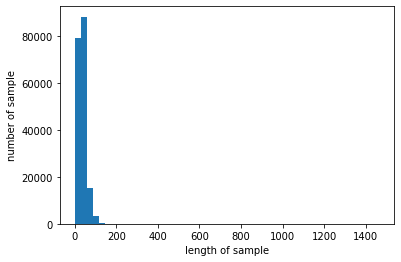

In [5]:
max_len = max(len(l) for l in raw_corpus)
print('최대 길이 : %d' % max_len)
print('최소 길이 : %d' % min(len(l) for l in raw_corpus))
print('평균 길이 : %f' % (sum(map(len, raw_corpus))/len(raw_corpus)))
plt.hist([len(s) for s in raw_corpus], bins=50)
plt.xlabel('length of sample')
plt.ylabel('number of sample')
plt.show()

1,000이 넘는 지나치게 긴 길이가 있는 문장이 존재한다.
<br/>왜 그럴까?

print를 이용해 직접 1,000이 넘는 문장을 출력해서 문제 원인을 확인한다.

In [6]:
for i in raw_corpus:
  if len(i) >= 1000:
    print(i)

WRITERS RUSSELL BROWN, IRWIN LEVINE I'm comin' home, I've done my time Now I've got to know what is and isn't mine If you received my letter telling you I'd soon be free Then you'll know just what to do if you still want me If you still want me Just tie a yellow ribbon 'round the old oak tree It's been way too long, do you still want me? If I don't see a ribbon 'round the old oak tree I'll just stay on the bus, forget about us, put the blame on me If I don't see a yellow ribbon 'round the old oak tree Bus driver, please look for me 'Cause I couldn't bear to see what I might see I'm really still in prison and my love, he holds the key A simple yellow ribbon's all I need to set me free I wrote and told him please... Just tie a yellow ribbon 'round the old oak tree It's been way too long, do you still want me? If I don't see a ribbon 'round the old oak tree I'll just stay on the bus, forget about us, put the blame on me If I don't see a ribbon 'round the old oak tree Tie a yellow ribbon '

데이터셋 자체의 문제이다.
<br/>웹크롤링 당시 줄바꿈되지 않은 채 여러 문장이 하나의 문장으로 이어져 txt 파일에 담긴 것이다.

In [7]:
pip install nltk

#데이터셋의 한계

##문장 토큰화

문장 토큰화를 하는 함수 **nltk.tokenize**의 **sent_tokenize**가 있으나
<br/>마침표를 기준으로 문장을 나누기 때문에 길이가 1000이 넘는 문장을 구분할 수 없다.
<br/>이 문장 안에는 마침표가 존재하지 않는다.

> WRITERS RUSSELL BROWN, IRWIN LEVINE I'm comin' home, I've done my time Now I've got to know what is and isn't mine If you receive (생략)

##데이터셋의 한계

In [9]:
entire_sentence_num = 0
for i in raw_corpus:
  entire_sentence_num += 1

print('전체 문장 개수 : %d' % entire_sentence_num)

fifteen_sentence_num = 0
for i in raw_corpus:
  if len(i.split()) <=14:
    fifteen_sentence_num += 1

print('단어 15개 미만의 문장 개수 : %d' % fifteen_sentence_num)

num_difference = entire_sentence_num - fifteen_sentence_num
print('단어 15개 기준 전처리 이후 제외되는 문장 개수 : %d' % num_difference)

전체 문장 개수 : 187088
단어 15개 미만의 문장 개수 : 177427
단어 15개 기준 전처리 이후 제외되는 문장 개수 : 9661


지나치게 긴 문장은 다른 데이터들이 과도한 Padding을 갖게 하므로 제거할 필요가 있다. 
<br/>토큰의 단위를 단어로 설정하고
<br/>단어의 개수가 15개를 넘어가는 문장을 데이터셋에서 제외한다.

단어 15개를 기준으로 전처리 이후 제외된 문장의 개수는 9661개이다.

9600개가 넘는 문장의 데이터를 잃지만 전처리를 통해 정제된 데이터를 얻을 수 있다.

최대 길이 : 108
최소 길이 : 0
평균 길이 : 34.977070


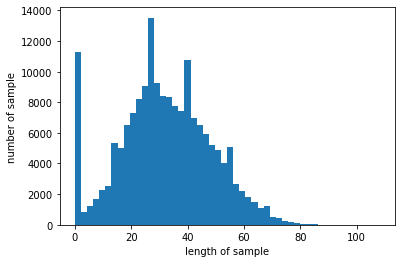

In [10]:
max_len = max([len(i) for i in raw_corpus if len(i.split()) <=14])
print('최대 길이 : %d' % max_len)
print('최소 길이 : %d' % min(len(l) for l in raw_corpus))
print('평균 길이 : %f' % (sum(map(len, raw_corpus))/len(raw_corpus)))
plt.hist([len(s) for s in raw_corpus if len(s.split()) <=14], bins=50)
plt.xlabel('length of sample')
plt.ylabel('number of sample')
plt.show()

In [11]:
j = 1
for i in raw_corpus:
  if len(i) == 108:
    while j < 2:
      print(i)
      j += 1

Who you are and where you stand in the struggle They go so very, so very, so very, so very, so very, so very


단어 15개 미만의 문장 중에서 가장 길이가 긴 문장의 사례이다.

단어 15개 미만으로 전처리했어도
<br/>여러 문장이 하나의 문장으로 합쳐진 사례가 등장한다.
<br/>데이터셋과 전처리의 한계이다.

#데이터 전처리

##특수문자, 공백 제거

In [12]:
def preprocess_sentence(sentence):
    sentence = sentence.lower().strip() 
    sentence = re.sub(r"([?.!,¿])", r" \1 ", sentence)
    sentence = re.sub(r'[" "]+', " ", sentence)
    sentence = re.sub(r"[^a-zA-Z?.!,¿]+", " ", sentence)
    sentence = sentence.strip()
    sentence = '<start> ' + sentence + ' <end>'
    return sentence


print(preprocess_sentence("This @_is ;;;sample        sentence."))

<start> this is sample sentence . <end>


**lower.strip**은 소문자로 바꾸고, 양쪽 공백을 지운다.


**sub**을 이용해 특수문자 양쪽에 공백을 넣는다.
<br/>여러개의 공백은 하나의 공백으로 바꾼다.
<br/>a-zA-Z?.!,¿가 아닌 모든 문자를 하나의 공백으로 바꾼다.

**strip**은 다시 양쪽 공백을 지운다.

문장 시작에는 start, 끝에는 end를 추가한다.

##문장 길이 (0,14)

In [13]:
corpus = []

for sentence in raw_corpus:
    if len(sentence) == 0: continue
    if len(sentence.split()) >= 15: continue
    if sentence[-1] == ":": continue
    
    preprocessed_sentence = preprocess_sentence(sentence)
    corpus.append(preprocessed_sentence)
        
corpus[:3]

['<start> don t worry about a thing , <end>',
 '<start> cause every little thing gonna be all right . <end>',
 '<start> singin don t worry about a thing , <end>']

corpus 리스트에 정제된 문장을 담는다.

문장의 길이가 0인 문장은 넘어간다.

단어의 개수가 15 이상인 문장은 넘어간다.

마지막에 기호 :가 있는 문장은 리스트에 담지 않고 넘어간다.

In [14]:
def tokenize(corpus):
    tokenizer = tf.keras.preprocessing.text.Tokenizer(
        num_words=12000, 
        filters=' ',
        oov_token="<unk>"
    )
    
    tokenizer.fit_on_texts(corpus)
    tensor = tokenizer.texts_to_sequences(corpus)   
    tensor = tf.keras.preprocessing.sequence.pad_sequences(tensor, padding='post')  
    
    print(tensor,tokenizer)
    return tensor, tokenizer

tensor, tokenizer = tokenize(corpus)

[[   2   35   15 ...    0    0    0]
 [   2   66  128 ...    0    0    0]
 [   2 1583   35 ...    0    0    0]
 ...
 [   2   43  896 ...    0    0    0]
 [   2   43   67 ...    0    0    0]
 [   2    8   83 ...    0    0    0]] <keras_preprocessing.text.Tokenizer object at 0x7f375cbe3390>


**tokenizer**는 내부 단어장의 크기를 12000로 갖는다.
<br/>단어장에 포함되지 못한 단어는 'unk'로 저장한다. 

준비한 tokenizer를 이용해 corpus를 Tensor로 변환한다.

입력 데이터의 시퀀스 길이를 일정하게 맞춰줍니다
<br/>만약 시퀀스가 짧다면 문장 뒤에 패딩을 붙여 길이를 맞춰줍니다.
<br/>문장 앞에 패딩을 붙여 길이를 맞추고 싶다면 padding='pre'를 사용합니다

In [15]:
print(tensor[:3, :10])

[[   2   35   15  709  113    9  185    4    3    0]
 [   2   66  128  118  185   99   27   25   85   19]
 [   2 1583   35   15  709  113    9  185    4    3]]


In [16]:
for idx in tokenizer.index_word:
    print(idx, ":", tokenizer.index_word[idx])

    if idx >= 10: break

1 : <unk>
2 : <start>
3 : <end>
4 : ,
5 : i
6 : the
7 : you
8 : and
9 : a
10 : to


In [17]:
# tensor에서 마지막 토큰을 잘라내서 소스 문장을 생성합니다
# 마지막 토큰은 <end>가 아니라 <pad>일 가능성이 높습니다.
src_input = tensor[:, :-1]  
# tensor에서 <start>를 잘라내서 타겟 문장을 생성합니다.
tgt_input = tensor[:, 1:]    

print(src_input[0])
print(tgt_input[0])

[  2  35  15 709 113   9 185   4   3   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
[ 35  15 709 113   9 185   4   3   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0]


# 데이터 분할

In [ ]:
enc_train, enc_val, dec_train, dec_val = <코드 작성>

In [ ]:
BUFFER_SIZE = len(src_input)
BATCH_SIZE = 256
steps_per_epoch = len(src_input) // BATCH_SIZE

 # tokenizer가 구축한 단어사전 내 7000개와, 여기 포함되지 않은 0:<pad>를 포함하여 7001개
VOCAB_SIZE = tokenizer.num_words + 1   

# 준비한 데이터 소스로부터 데이터셋을 만듭니다
# 데이터셋에 대해서는 아래 문서를 참고하세요
# 자세히 알아둘수록 도움이 많이 되는 중요한 문서입니다
# https://www.tensorflow.org/api_docs/python/tf/data/Dataset
dataset = tf.data.Dataset.from_tensor_slices((src_input, tgt_input))
dataset = dataset.shuffle(BUFFER_SIZE)
dataset = dataset.batch(BATCH_SIZE, drop_remainder=True)
dataset

훈련 데이터와 평가 데이터를 분리하세요!

tokenize() 함수로 데이터를 Tensor로 변환한 후, sklearn 모듈의 train_test_split() 함수를 사용해 훈련 데이터와 평가 데이터를 분리하도록 하겠습니다. 단어장의 크기는 12,000 이상 으로 설정하세요! 총 데이터의 20% 를 평가 데이터셋으로 사용해 주세요!

#모델 설계

In [ ]:
class TextGenerator(tf.keras.Model):
    def __init__(self, vocab_size, embedding_size, hidden_size):
        super().__init__()
        
        self.embedding = tf.keras.layers.Embedding(vocab_size, embedding_size)
        self.rnn_1 = tf.keras.layers.LSTM(hidden_size, return_sequences=True)
        self.rnn_2 = tf.keras.layers.LSTM(hidden_size, return_sequences=True)
        self.linear = tf.keras.layers.Dense(vocab_size)
        
    def call(self, x):
        out = self.embedding(x)
        out = self.rnn_1(out)
        out = self.rnn_2(out)
        out = self.linear(out)
        
        return out
    
embedding_size = 256
hidden_size = 1024
model = TextGenerator(tokenizer.num_words + 1, embedding_size , hidden_size)

In [ ]:
model.summary()

In [ ]:
# optimizer와 loss등은 차차 배웁니다
# 혹시 미리 알고 싶다면 아래 문서를 참고하세요
# https://www.tensorflow.org/api_docs/python/tf/keras/optimizers
# https://www.tensorflow.org/api_docs/python/tf/keras/losses
# 양이 상당히 많은 편이니 지금 보는 것은 추천하지 않습니다
optimizer = tf.keras.optimizers.Adam()
loss = tf.keras.losses.SparseCategoricalCrossentropy(
    from_logits=True,
    reduction='none'
)

model.compile(loss=loss, optimizer=optimizer)
model.fit(dataset, epochs=30)

In [ ]:
def generate_text(model, tokenizer, init_sentence="<start>", max_len=20):
    # 테스트를 위해서 입력받은 init_sentence도 텐서로 변환합니다
    test_input = tokenizer.texts_to_sequences([init_sentence])
    test_tensor = tf.convert_to_tensor(test_input, dtype=tf.int64)
    end_token = tokenizer.word_index["<end>"]

    # 단어 하나씩 예측해 문장을 만듭니다
    #    1. 입력받은 문장의 텐서를 입력합니다
    #    2. 예측된 값 중 가장 높은 확률인 word index를 뽑아냅니다
    #    3. 2에서 예측된 word index를 문장 뒤에 붙입니다
    #    4. 모델이 <end>를 예측했거나, max_len에 도달했다면 문장 생성을 마칩니다
    while True:
        # 1
        predict = model(test_tensor) 
        # 2
        predict_word = tf.argmax(tf.nn.softmax(predict, axis=-1), axis=-1)[:, -1] 
        # 3 
        test_tensor = tf.concat([test_tensor, tf.expand_dims(predict_word, axis=0)], axis=-1)
        # 4
        if predict_word.numpy()[0] == end_token: break
        if test_tensor.shape[1] >= max_len: break

    generated = ""
    # tokenizer를 이용해 word index를 단어로 하나씩 변환합니다 
    for word_index in test_tensor[0].numpy():
        generated += tokenizer.index_word[word_index] + " "

    return generated

In [ ]:
# 데이터셋에서 데이터 한 배치만 불러오는 방법입니다.
# 지금은 동작 원리에 너무 빠져들지 마세요~
for src_sample, tgt_sample in dataset.take(1): break

# 한 배치만 불러온 데이터를 모델에 넣어봅니다
model(src_sample)

In [ ]:
#Loss
loss = tf.keras.losses.SparseCategoricalCrossentropy(
    from_logits=True, reduction='none')

In [ ]:
generate_text(lyricist, tokenizer, init_sentence="<start> i love", max_len=20)

모델의 Embedding Size와 Hidden Size를 조절하며 10 Epoch 안에 val_loss 값을 2.2 수준으로 줄일 수 있는 모델을 설계하세요! (Loss는 아래 제시된 Loss 함수를 그대로 사용!)

그리고 멋진 모델이 생성한 가사 한 줄을 제출하시길 바랍니다!

#하이퍼 파라미터 조정

**굵은 텍스트**##최종 결과를 직접 눈으로 확인해보기

#결론

#참고문헌